### ***`Import Libraries`***



In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ***`Load Dataset`***

In [ ]:
# Load the dataset
file_path = 'apple_financial_data.csv'
df = pd.read_csv(file_path)

### ***`Dataset Overview`***

In [ ]:
# Initial Exploration
print(df.head())

   Year    EBITDA   Revenue Gross Profit Op Income Net Income    EPS  \
0  2024  $134,661  $391,035     $180,683  $123,216    $93,736  $6.08   
1  2023  $125,820  $383,285     $169,148  $114,301    $96,995  $6.13   
2  2022  $130,541  $394,328     $170,782  $119,437    $99,803  $6.11   
3  2021  $120,233  $365,817     $152,836  $108,949    $94,680  $5.61   
4  2020   $77,344  $274,515     $104,956   $66,288    $57,411  $3.28   

  Shares Outstanding  Year Close Price Total Assets Cash on Hand  \
0             15,408          243.0400     $364,980      $65,171   
1             15,813          191.5919     $352,583      $61,555   
2             16,326          128.5816     $352,755      $48,304   
3             16,865          174.7132     $351,002      $62,639   
4             17,528          129.7556     $323,888      $90,943   

  Long Term Debt Total Liabilities Gross Margin  PE ratio Employees  
0        $85,750          $308,030       46.21%     39.97  1,64,000  
1        $95,281  

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                16 non-null     int64  
 1   EBITDA              16 non-null     object 
 2   Revenue             16 non-null     object 
 3   Gross Profit        16 non-null     object 
 4   Op Income           16 non-null     object 
 5   Net Income          16 non-null     object 
 6   EPS                 16 non-null     object 
 7   Shares Outstanding  16 non-null     object 
 8   Year Close Price    16 non-null     float64
 9   Total Assets        16 non-null     object 
 10  Cash on Hand        16 non-null     object 
 11  Long Term Debt      16 non-null     object 
 12  Total Liabilities   16 non-null     object 
 13  Gross Margin        16 non-null     object 
 14  PE ratio            16 non-null     float64
 15  Employees           16 non-null     object 
dtypes: float64

In [ ]:
print(df.describe())

              Year  Year Close Price   PE ratio
count    16.000000         16.000000  16.000000
mean   2016.500000         72.092675  19.438750
std       4.760952         76.299400   9.521776
min    2009.000000          6.348100   9.730000
25%    2012.750000         17.153925  12.327500
50%    2016.500000         32.238800  15.780000
75%    2020.250000        128.875100  24.100000
max    2024.000000        243.040000  39.970000


### ***`Data Preprocessing`***

In [ ]:
# Check for missing values
print(df.isnull().sum())

Year                  0
EBITDA                0
Revenue               0
Gross Profit          0
Op Income             0
Net Income            0
EPS                   0
Shares Outstanding    0
Year Close Price      0
Total Assets          0
Cash on Hand          0
Long Term Debt        0
Total Liabilities     0
Gross Margin          0
PE ratio              0
Employees             0
dtype: int64


In [ ]:
# Fill or drop missing values
df.fillna(method='ffill', inplace=True)

<ipython-input-36-137573300e92>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Convert columns (e.g., Convert financial column formatted as '$123,456' into numeric values foramtted as '123,456' )
column_to_convert = ['EBITDA', 'Revenue', 'Gross Profit', 'Op Income', 'Net Income', 'EPS', 'Total Assets', 'Cash on Hand', 'Long Term Debt', 'Total Liabilities']
for col in column_to_convert:
    df[col] = df[col].replace({'\$':'', ',':''},regex=True).astype(float)
print(df[column_to_convert].head())

     EBITDA   Revenue  Gross Profit  Op Income  Net Income   EPS  \
0  134661.0  391035.0      180683.0   123216.0     93736.0  6.08   
1  125820.0  383285.0      169148.0   114301.0     96995.0  6.13   
2  130541.0  394328.0      170782.0   119437.0     99803.0  6.11   
3  120233.0  365817.0      152836.0   108949.0     94680.0  5.61   
4   77344.0  274515.0      104956.0    66288.0     57411.0  3.28   

   Total Assets  Cash on Hand  Long Term Debt  Total Liabilities  
0      364980.0       65171.0         85750.0           308030.0  
1      352583.0       61555.0         95281.0           290437.0  
2      352755.0       48304.0         98959.0           302083.0  
3      351002.0       62639.0        109106.0           287912.0  
4      323888.0       90943.0         98667.0           258549.0  


### ***`Exploratory Data Analysis (EDA)`***

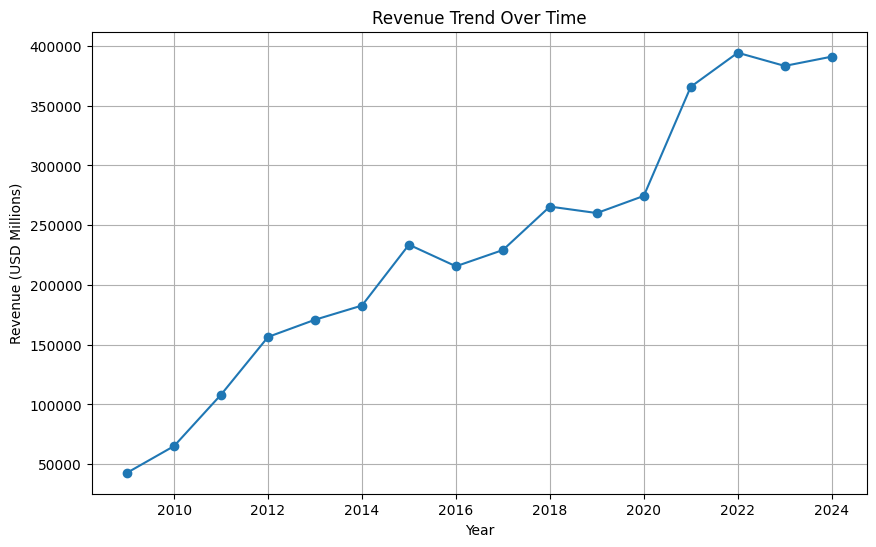

In [ ]:
# Key Metrics Over Time

# Revenue Trend
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Revenue'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Revenue (USD Millions)')
plt.title('Revenue Trend Over Time')
plt.grid(True)
plt.show()

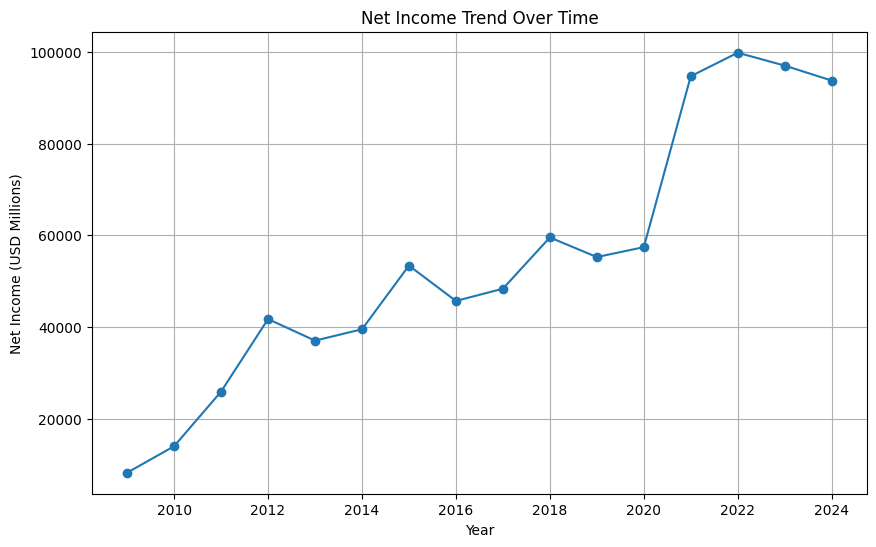

In [ ]:
# Net Income Trend
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Net Income'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Net Income (USD Millions)')
plt.title('Net Income Trend Over Time')
plt.grid(True)
plt.show()

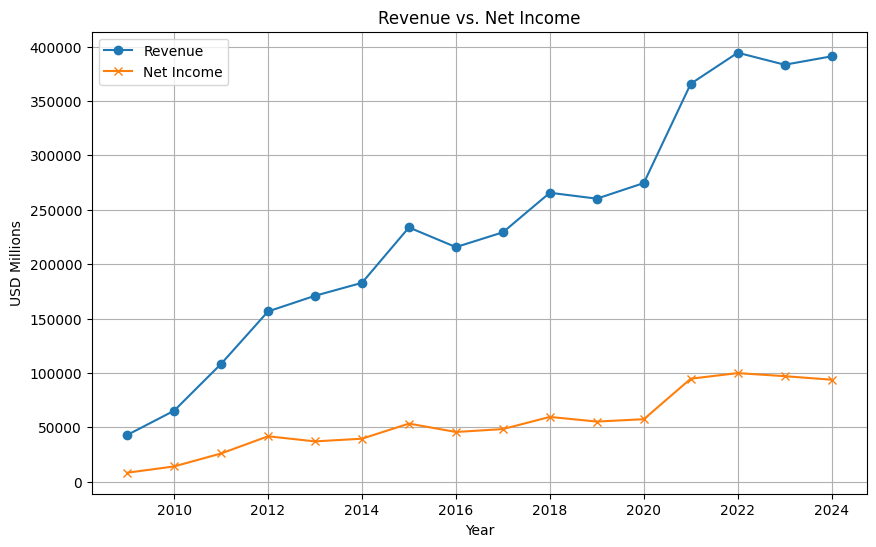

In [ ]:
# Revenue vs. Net Income
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Revenue'], label='Revenue', marker='o')
plt.plot(df['Year'], df['Net Income'], label='Net Income', marker='x')
plt.xlabel('Year')
plt.ylabel('USD Millions')
plt.title('Revenue vs. Net Income')
plt.legend()
plt.grid(True)
plt.show()

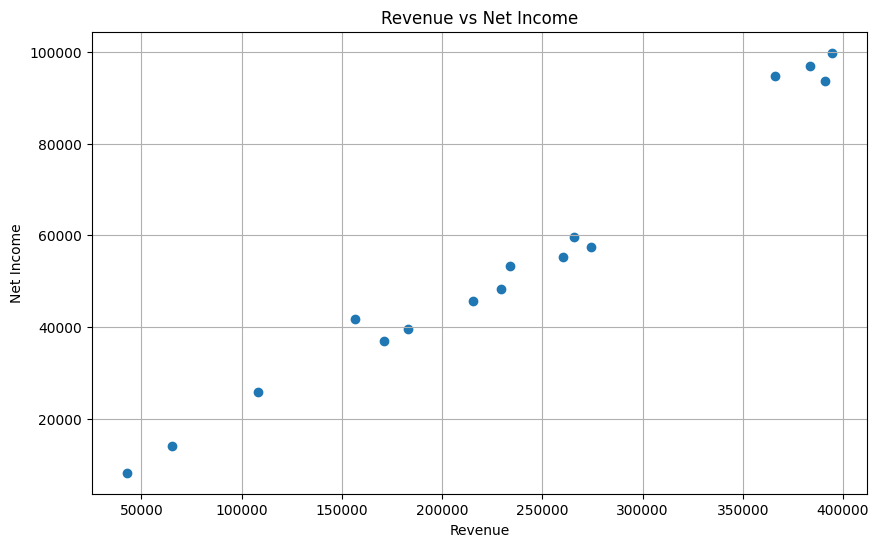

In [ ]:
# Scatter plot of Revenue vs Net Income
plt.figure(figsize=(10,6))
plt.scatter(df['Revenue'], df['Net Income'])
plt.xlabel('Revenue')
plt.ylabel('Net Income')
plt.title('Revenue vs Net Income')
plt.grid(True)
plt.show()

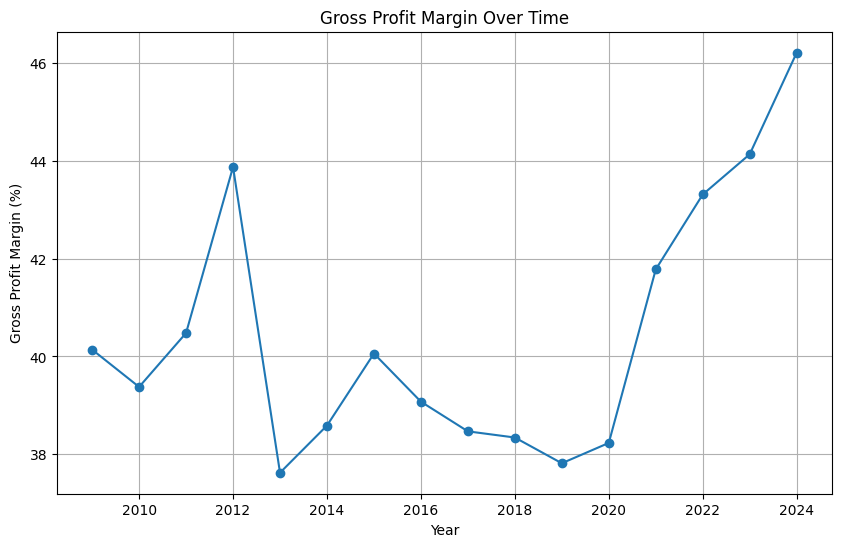

In [ ]:
# Profitability Ratios (e.g., Gross Profit Margin)
df['Gross Profit Margin'] = (df['Gross Profit'] / df['Revenue']) * 100
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Gross Profit Margin'], marker='o')
plt.xlabel('Year')
plt.ylabel('Gross Profit Margin (%)')
plt.title('Gross Profit Margin Over Time')
plt.grid(True)
plt.show()

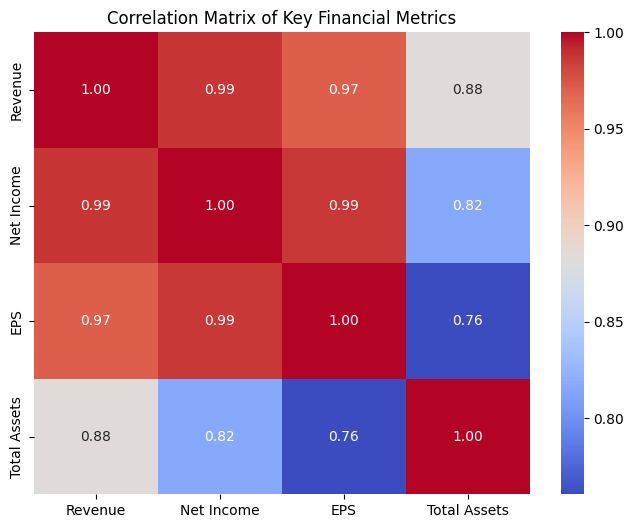

In [ ]:
# Key Financial Metrics Correlation
correlation_matrix = df[['Revenue', 'Net Income', 'EPS', 'Total Assets']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Financial Metrics')
plt.show()

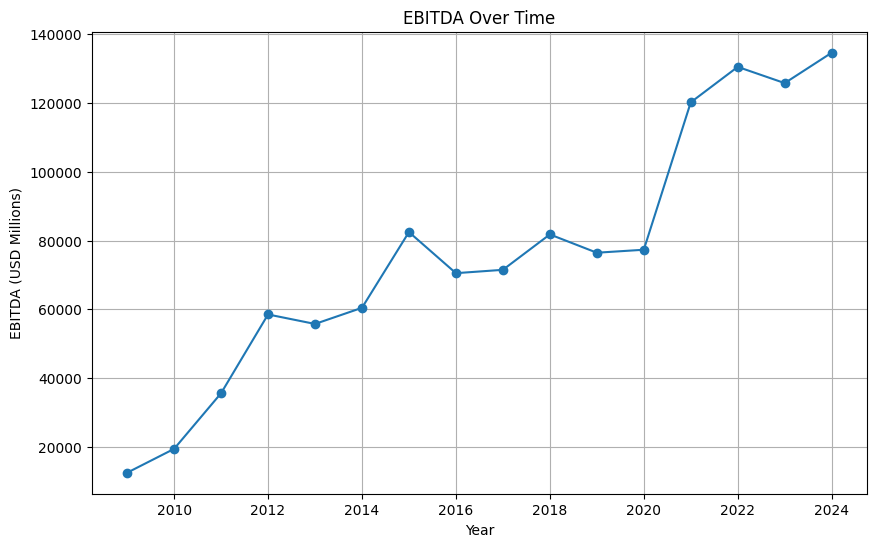

In [ ]:
#  EBITDA over time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['EBITDA'], marker='o')
plt.xlabel('Year')
plt.ylabel('EBITDA (USD Millions)')
plt.title('EBITDA Over Time')
plt.grid(True)
plt.show()

### ***`Feature Engineering`***

In [ ]:
# Debt-to-Asset Ratio
df['Debt-to-Asset Ratio'] = df['Long Term Debt'] / df['Total Assets']

# Profitability Ratio (Return on Assets - ROA)
df['Profitability Ratio (ROA)'] = df['Net Income'] / df['Revenue']

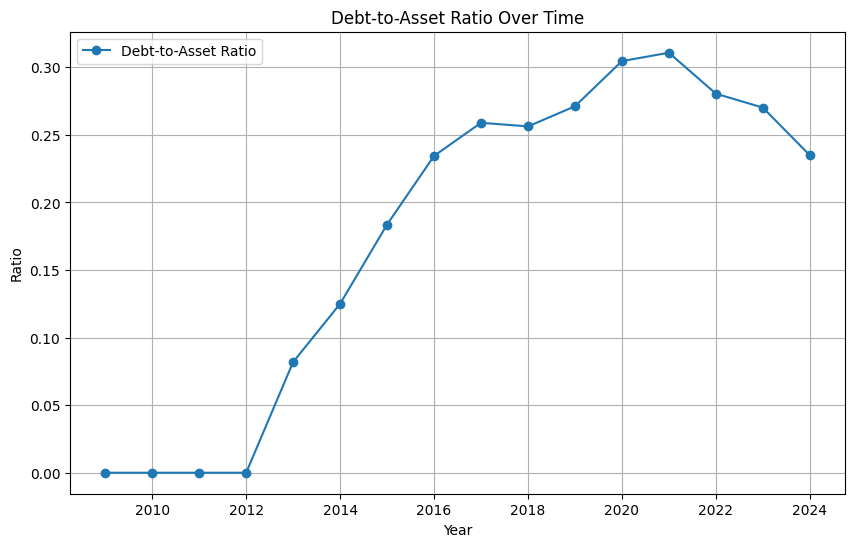

In [ ]:
# Visualization for new metrics
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Debt-to-Asset Ratio'], marker='o', label='Debt-to-Asset Ratio')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Debt-to-Asset Ratio Over Time')
plt.legend()
plt.grid(True)
plt.show()

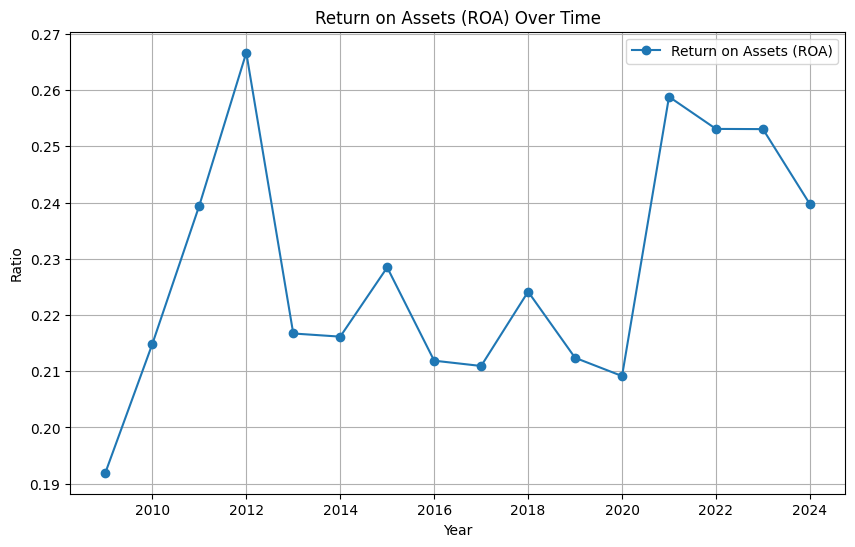

In [ ]:
# Return on Assets Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Profitability Ratio (ROA)'], marker='o', label='Return on Assets (ROA)')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Return on Assets (ROA) Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Display the updated DataFrame with the new metrics
print(df[['Year', 'Debt-to-Asset Ratio', 'Profitability Ratio (ROA)']])

    Year  Debt-to-Asset Ratio  Profitability Ratio (ROA)
0   2024             0.234944                   0.239713
1   2023             0.270237                   0.253062
2   2022             0.280532                   0.253096
3   2021             0.310842                   0.258818
4   2020             0.304633                   0.209136
5   2019             0.271204                   0.212381
6   2018             0.256299                   0.224142
7   2017             0.258998                   0.210924
8   2016             0.234474                   0.211868
9   2015             0.183675                   0.228458
10  2014             0.125031                   0.216144
11  2013             0.081932                   0.216705
12  2012             0.000000                   0.266651
13  2011             0.000000                   0.239466
14  2010             0.000000                   0.214841
15  2009             0.000000                   0.191936


### ***`Predictive Modelling`***

In [ ]:
# Predictive revenue for future years using Linear Regression

from sklearn.linear_model import LinearRegression

# Prepare the data for linear regression
X = df[['Year']]
y = df['Revenue']

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict revenue for future years
future_years = np.array(range(2024, 2030)).reshape(-1, 1)  # Predict for 2024-2029
future_revenue = model.predict(future_years)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


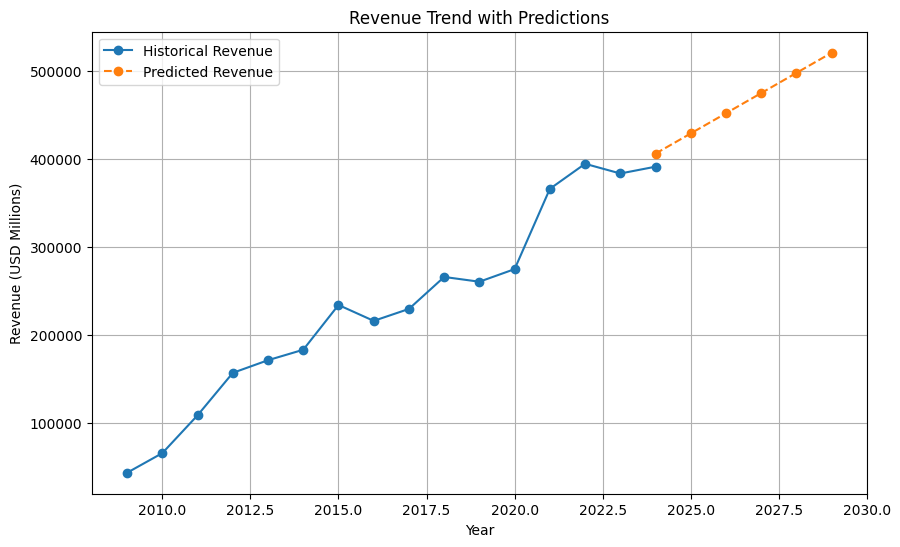

In [ ]:
# Plot the historical and predicted revenue
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Revenue'], marker='o', linestyle='-', label='Historical Revenue')
plt.plot(future_years, future_revenue, marker='o', linestyle='--', label='Predicted Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (USD Millions)')
plt.title('Revenue Trend with Predictions')
plt.legend()
plt.grid(True)
plt.show()